In [ ]:
# CS 451
# Coding Practice Session 1
# Last name: Marques
# Email: gmarques@crimson.ua.edu
# Q1 
# Dataset Creation
# Create a dataset containing three columns:
# The first column should list five movies that you have watched.
# The second column should describe some highlighted features of the movies 
# The third column should describe some drawbacks of the movies that you can think of.

import pandas as pd

data = {
    'Movie': ['Interstellar', 'Moneyball', 'Forrest Gump', 'The Big Short', 'Greenland'],
    'Highlights': ['Really cool visuals!', 'Interesting story', 'Emotional plot', 'Highlights corruption in banks', 'Intense, action-filled escapes'],
    'Drawbacks': ['Long and slow-moving.', 'Historically inaccurate', 'Toxic romance', 'Excessive narration, and 4th wall breaks', 'Some characters\' choices are frustrating']
}

df = pd.DataFrame(data)
print(df)

           Movie                      Highlights  \
0   Interstellar            Really cool visuals!   
1      Moneyball               Interesting story   
2   Forrest Gump                  Emotional plot   
3  The Big Short  Highlights corruption in banks   
4      Greenland  Intense, action-filled escapes   

                                  Drawbacks  
0                     Long and slow-moving.  
1                   Historically inaccurate  
2                             Toxic romance  
3  Excessive narration, and 4th wall breaks  
4  Some characters' choices are frustrating  


In [2]:
# Q2 
# Data cleaning
# Remove all punctuation marks from the "Highlights" and "Drawbacks" columns.

import string 
import re

regex_punctuation = f'[{re.escape(string.punctuation)}]'

df['Highlights'] = df['Highlights'].str.replace(regex_punctuation, '', regex=True)
df['Drawbacks'] = df['Drawbacks'].str.replace(regex_punctuation, '', regex=True)

print(df)



           Movie                      Highlights  \
0   Interstellar             Really cool visuals   
1      Moneyball               Interesting story   
2   Forrest Gump                  Emotional plot   
3  The Big Short  Highlights corruption in banks   
4      Greenland    Intense actionfilled escapes   

                                 Drawbacks  
0                      Long and slowmoving  
1                  Historically inaccurate  
2                            Toxic romance  
3  Excessive narration and 4th wall breaks  
4  Some characters choices are frustrating  


In [3]:
# Q3
# Unique Word Count
# Add a new column to the dataset that contains the count of unique words from
# both the "Highlights" and "Drawbacks" columns for each row (from question 2).

def unique_word_count(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words)

df['Unique Word Count'] = df['Highlights'].apply(unique_word_count) + df['Drawbacks'].apply(unique_word_count)

print(df)


           Movie                      Highlights  \
0   Interstellar             Really cool visuals   
1      Moneyball               Interesting story   
2   Forrest Gump                  Emotional plot   
3  The Big Short  Highlights corruption in banks   
4      Greenland    Intense actionfilled escapes   

                                 Drawbacks  Unique Word Count  
0                      Long and slowmoving                  6  
1                  Historically inaccurate                  4  
2                            Toxic romance                  4  
3  Excessive narration and 4th wall breaks                 10  
4  Some characters choices are frustrating                  8  


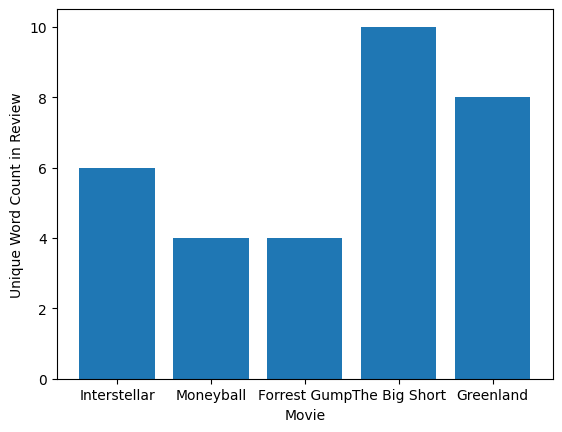

In [4]:
# Q4
# Bar Chart
# Create a bar chart (Bar Plot) that displays the total word count (combining the 
# word count from both the "Highlights" and "Drawbacks" columns - question 3) for 
# each movie in the dataset. The x-axis should represent the movie names, and 
# the y-axis should represent the word count.

import matplotlib.pyplot as plt

plt.bar(df['Movie'], df['Unique Word Count'])
plt.xlabel('Movie')
plt.ylabel('Unique Word Count in Review')
plt.show()

In [5]:
# Q5 
# Import Dataset
# Import the Iris dataset using the given link or from sklearn to your notebook.
# Use a dataframe to store the iris data.

from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53) 
iris_df = pd.DataFrame(iris.data.original)

print(iris_df.head())


   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


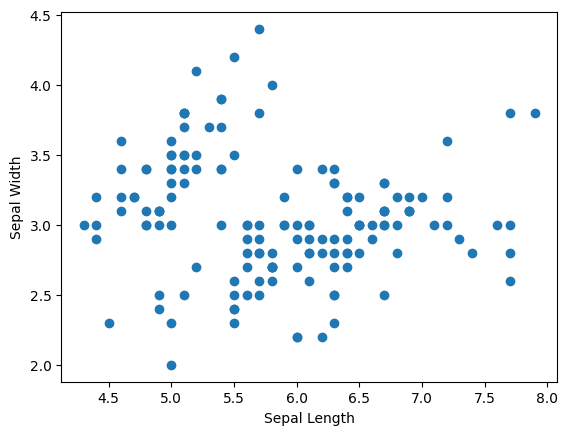

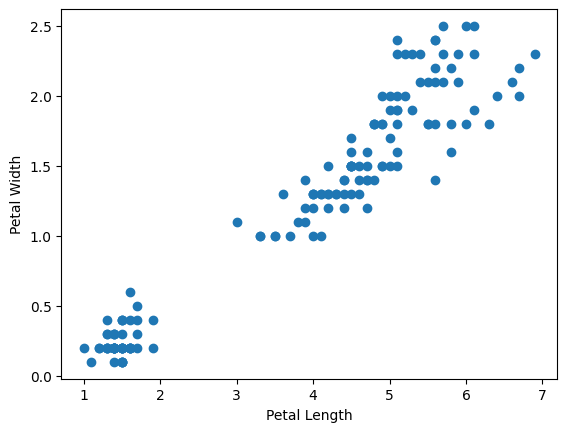

In [6]:
# Q6
# Scatterplot
# Use a scatterplot to show all the classes of Iris dataset

plt.scatter(iris_df['sepal length'], iris_df['sepal width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

plt.scatter(iris_df['petal length'], iris_df['petal width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [7]:
# Q7 
# Data Exploration
# Perform an exploration of the Iris dataset (from question 5) by calculating 
# summary statistics for each numeric feature. Use Pandas to compute 
# mean, median, standard deviation

numeric_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

for col in numeric_columns:
    mean = iris_df[col].mean()
    median = iris_df[col].median()
    std = iris_df[col].std()

    print(col +':' 
          + '\nMean: ' + str(mean)
          + '\nMedian: ' + str(median)
          + '\nStandard deviation: ' + str(std) + '\n')



sepal length:
Mean: 5.843333333333334
Median: 5.8
Standard deviation: 0.828066127977863

sepal width:
Mean: 3.0540000000000003
Median: 3.0
Standard deviation: 0.4335943113621737

petal length:
Mean: 3.758666666666666
Median: 4.35
Standard deviation: 1.7644204199522626

petal width:
Mean: 1.1986666666666668
Median: 1.3
Standard deviation: 0.7631607417008411



In [8]:
# Q8
# Feature Scaling
# Apply feature scaling to standardize the Iris dataset's (from question 5) numeric 
# features using StandardScaler. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.data.features)
scaled_df = pd.DataFrame(scaled_features, columns=iris.data.features.columns)
print(scaled_df.head())


   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


In [12]:
# Q9
# Correlation Analysis
# Find the correlation between sepal and petal length of Iris Dataset (from question 5). 
# Also find the correlation matrix of numeric features.

sepal_petal_corr = iris_df['sepal length'].corr(iris_df['petal length'])
print('Correlation between sepal length and petal length: ' + str(sepal_petal_corr))

corr_matrix = iris.data.features.corr()
print(corr_matrix)


Correlation between sepal length and petal length: 0.8717541573048712
              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


In [ ]:
# Q10

from names_dataset import NameDataset

first_name = 'Gabriel'
last_name = 'Marques'
email = 'gmarques@crimson.ua.edu'
print(first_name, last_name, email)

nd = NameDataset()
result = nd.search(first_name)
print(result)

Gabriel Marques gmarques@crimson.ua.edu
{'first_name': {'country': {'Brazil': 0.188, 'Chile': 0.084, 'Colombia': 0.116, 'Spain': 0.07, 'France': 0.068, 'Italy': 0.073, 'Mexico': 0.143, 'Nigeria': 0.047, 'Peru': 0.048, 'United States': 0.163}, 'gender': {'Female': 0.013, 'Male': 0.987}, 'rank': {'Brazil': 8, 'Chile': 61, 'Colombia': 117, 'Spain': 131, 'France': 244, 'Italy': 350, 'Mexico': 59, 'Nigeria': 82, 'Peru': 112, 'United States': 141}}, 'last_name': {'country': {'Brazil': 0.316, 'France': 0.068, 'United Kingdom': 0.029, 'Guatemala': 0.028, 'Italy': 0.082, 'Mexico': 0.057, 'Nigeria': 0.236, 'Peru': 0.032, 'United States': 0.12, 'South Africa': 0.031}, 'gender': {}, 'rank': {'Brazil': 75, 'France': 410, 'United Kingdom': 1238, 'Guatemala': 173, 'Italy': 1310, 'Mexico': 589, 'Nigeria': 74, 'Peru': 466, 'United States': 732, 'South Africa': 1349}}}
